In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
data = pd.read_csv('TSLA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [4]:
prices = data['Close'].values.reshape(-1, 1)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

window_size = 30


In [6]:
train_size = int(len(prices_scaled) * 0.8)
train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

In [7]:
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequence = data[i:i + window_size]
        sequences.append(sequence)
    return np.array(sequences)

train_sequences = create_sequences(train_data, window_size)
test_sequences = create_sequences(test_data, window_size)

In [8]:
X_train, y_train = train_sequences[:, :-1], train_sequences[:, -1]
X_test, y_test = test_sequences[:, :-1], test_sequences[:, -1]

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size - 1, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [11]:
epochs = 100
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/100
60/60 [==============================] - 4s 24ms/step - loss: 0.0049 - val_loss: 0.0014
Epoch 2/100
60/60 [==============================] - 1s 14ms/step - loss: 2.4022e-04 - val_loss: 0.0011
Epoch 3/100
60/60 [==============================] - 1s 15ms/step - loss: 2.2890e-04 - val_loss: 0.0012
Epoch 4/100
60/60 [==============================] - 1s 15ms/step - loss: 2.2130e-04 - val_loss: 0.0011
Epoch 5/100
60/60 [==============================] - 1s 15ms/step - loss: 2.1995e-04 - val_loss: 0.0012
Epoch 6/100
60/60 [==============================] - 1s 15ms/step - loss: 2.0840e-04 - val_loss: 9.7096e-04
Epoch 7/100
60/60 [==============================] - 1s 15ms/step - loss: 2.1018e-04 - val_loss: 9.6695e-04
Epoch 8/100
60/60 [==============================] - 1s 15ms/step - loss: 1.9313e-04 - val_loss: 0.0011
Epoch 9/100
60/60 [==============================] - 1s 15ms/step - loss: 1.7925e-04 - val_loss: 9.4197e-04
Epoch 10/100
60/60 [==============================] - 1s

In [12]:
y_pred = model.predict(X_test)

y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

15/15 [==============================] - 1s 6ms/step


In [13]:
rmse = np.sqrt(np.mean((y_pred_inverse - y_test_inverse) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 11.006647460918982


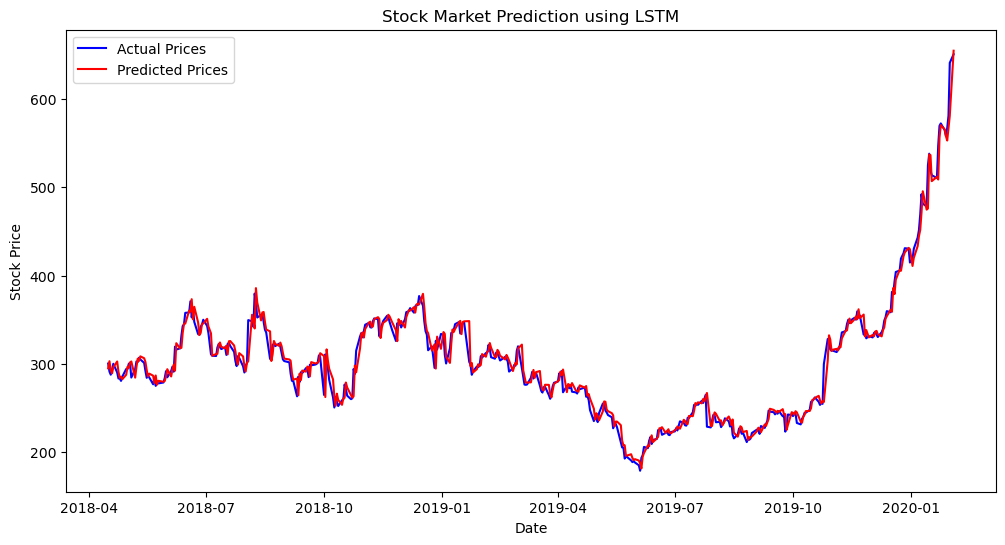

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size+window_size:], y_test_inverse, label='Actual Prices', color='blue')
plt.plot(data.index[train_size+window_size:], y_pred_inverse, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Market Prediction using LSTM')
plt.legend()
plt.show()
